<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              452 non-null    int64  
 1   W_PCT            452 non-null    float64
 2   MIN              452 non-null    float64
 3   FGM              452 non-null    float64
 4   FGA              452 non-null    float64
 5   FG_PCT           452 non-null    float64
 6   FG3M             452 non-null    float64
 7   FG3A             452 non-null    float64
 8   FG3_PCT          452 non-null    float64
 9   FTM              452 non-null    float64
 10  FTA              452 non-null    float64
 11  FT_PCT           452 non-null    float64
 12  OREB             452 non-null    float64
 13  DREB             452 non-null    float64
 14  REB              452 non-null    float64
 15  AST              452 non-null    float64
 16  TOV              452 non-null    float64
 17  STL             

<AxesSubplot:xlabel='W_PCT', ylabel='count'>

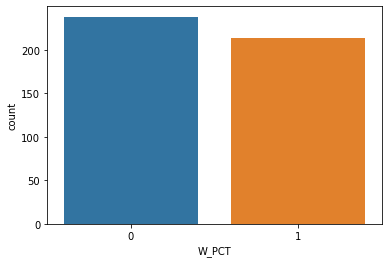

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
# step1 loading data,check null value
player=pd.read_csv('2010-11.csv',sep=',')
player.info()
player.isnull().sum()
# step 2, processing data,set up unique labels and group names,use labelEncoder to set up the ratio to 0,1,
# use sns to shrew it into  a graph
# may play with the bins and make the bins lean more towards the high win ratio
bins=(-0.1,0.5,1.0)
group_names=['lose','win']
player['W_PCT']=pd.cut(player['W_PCT'], bins=bins,labels=group_names)
player['W_PCT'].unique()
label_ratio=LabelEncoder()
player['W_PCT']=label_ratio.fit_transform(player['W_PCT'].astype(str))
player.head(20)
player['W_PCT'].value_counts()
sns.countplot(x=player['W_PCT'])


In [2]:
# step 3, seperate the dataset as response variable and feature variables, get ready for model
X=player.drop('W_PCT',axis=1)
y=player['W_PCT']

In [3]:
# step 4,Use train_test_split(package) to split the data to  Train data and Test data, default test_size 25%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
#step 5 ,Scale up the data Applying Standart scaling to get optimized result eg, big number overweight the impact of small number
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
# X_test[:10]


In [5]:
# step 6,choose classifier
# RANDOM FOREST -Least amount of parts to fine-tune,
# used for a medium sized data set
# 1,create randomForest variable,2,fit the training data to it,3 predict
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [6]:
# X_test[:20]
# the test data print out have been sacled

In [7]:
pred_rfc[:20]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [8]:
# check the performence of the model
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
# the consusion matrix report shows a lot of miss lable of 'win'


              precision    recall  f1-score   support

           0       0.88      0.86      0.87        51
           1       0.83      0.85      0.84        40

    accuracy                           0.86        91
   macro avg       0.85      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

[[44  7]
 [ 6 34]]


In [9]:
# SVM classifier
# clf=svm.SVC()
# clf.fit(X_train,y_train)
# pred_clf=clf.predict(X_test)


In [10]:
# check performence of model
# print(classification_report(y_test,pred_clf))
# print(confusion_matrix(y_test,pred_clf))

In [11]:
# Neural Network classifier
# works well with huge amount of data
# mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
# mlpc.fit(X_train,y_train)
# pred_mlpc=mlpc.predict(X_test)
# print(classification_report(y_test,pred_mlpc))
# print(confusion_matrix(y_test,pred_mlpc))
# A convergence point is a machine learning models localized optimal state. 
# It basically means that the variables within the model have the best posible values in order to
# predict a target feature based on another set of features. In MLP, these variables are the weights within each neuron. 
# Generally, when a data set doesn't represent a organized and discernable pattern, machine learning algorithms might not be able to find a convergence point

In [12]:
# last step, use the choosen model and given new feature data to predict 
Xnew=[[20,18,3.6,9.9,0.36,1.2,2,0.28,2,2,0.7,0.2,0,1,2,1,0.5,0.1,0.5,1.3,2,9,-2,15,0,0]]


In [13]:
Xnew=sc.transform(Xnew)
ynew=rfc.predict(Xnew)
ynew

array([0])